<a href="https://colab.research.google.com/github/malmusfer/fuel_consumption/blob/master/fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Simple Linear Regression</center></h1>


<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [2]:
!wget https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2019%20Fuel%20Consumption%20Ratings.csv

--2020-08-14 13:58:54--  https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2019%20Fuel%20Consumption%20Ratings.csv
Resolving www.nrcan.gc.ca (www.nrcan.gc.ca)... 198.103.48.143
Connecting to www.nrcan.gc.ca (www.nrcan.gc.ca)|198.103.48.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354937 (347K) [text/csv]
Saving to: ‘MY2019 Fuel Consumption Ratings.csv’

MY2019 Fuel Consump 100%[===================>] 346.62K  1.08MB/s    in 0.3s    

2020-08-14 13:58:55 (1.08 MB/s) - ‘MY2019 Fuel Consumption Ratings.csv’ saved [354937/354937]



In [4]:
df = pd.read_csv("MY2019FuelConsumptionRatings.csv", encoding="ISO-8859-1")
# take a look at the dataset
df.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns = map(str.lower, df.columns)
df.head()

,model,make,model.1,vehicle class,engine size,cylinders,transmission,fuel,fuel consumption,unnamed: 9,unnamed: 10,unnamed: 11,co2 emissions,co2,smog,unnamed: 15,unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,unnamed: 29,unnamed: 30,unnamed: 31,unnamed: 32,unnamed: 33,unnamed: 34,unnamed: 35,unnamed: 36,unnamed: 37,unnamed: 38,unnamed: 39,...,unnamed: 181,unnamed: 182,unnamed: 183,unnamed: 184,unnamed: 185,unnamed: 186,unnamed: 187,unnamed: 188,unnamed: 189,unnamed: 190,unnamed: 191,unnamed: 192,unnamed: 193,unnamed: 194,unnamed: 195,unnamed: 196,unnamed: 197,unnamed: 198,unnamed: 199,unnamed: 200,unnamed: 201,unnamed: 202,unnamed: 203,unnamed: 204,unnamed: 205,unnamed: 206,unnamed: 207,unnamed: 208,unnamed: 209,unnamed: 210,unnamed: 211,unnamed: 212,unnamed: 213,unnamed: 214,unnamed: 215,unnamed: 216,unnamed: 217,unnamed: 218,unnamed: 219,unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.rename({'model': 'model_year',
           'model.1': 'model_type',
           'vehicle class': 'vehicle_class',
           'engine size': 'engine_size_l',
           'fuel': 'fuel_type',
           'fuel consumption': 'fuel_consumption_city',
           'unnamed: 9': 'fuel_consumption_hwy',
           'unnamed: 10': 'fuel_consumption_comp',
           'unnamed: 11': 'fuel_consumption_comp_mpg',
           'co2 emissions' : 'co2_emissions',
           'co2': 'co2_rating',
           'smog': 'smog_rating'}, axis=1, inplace=True)

In [7]:
df.head()

,model_year,make,model_type,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comp,fuel_consumption_comp_mpg,co2_emissions,co2_rating,smog_rating,unnamed: 15,unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,unnamed: 29,unnamed: 30,unnamed: 31,unnamed: 32,unnamed: 33,unnamed: 34,unnamed: 35,unnamed: 36,unnamed: 37,unnamed: 38,unnamed: 39,...,unnamed: 181,unnamed: 182,unnamed: 183,unnamed: 184,unnamed: 185,unnamed: 186,unnamed: 187,unnamed: 188,unnamed: 189,unnamed: 190,unnamed: 191,unnamed: 192,unnamed: 193,unnamed: 194,unnamed: 195,unnamed: 196,unnamed: 197,unnamed: 198,unnamed: 199,unnamed: 200,unnamed: 201,unnamed: 202,unnamed: 203,unnamed: 204,unnamed: 205,unnamed: 206,unnamed: 207,unnamed: 208,unnamed: 209,unnamed: 210,unnamed: 211,unnamed: 212,unnamed: 213,unnamed: 214,unnamed: 215,unnamed: 216,unnamed: 217,unnamed: 218,unnamed: 219,unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2=df.iloc[1:, 1:15]
df2.head()

,make,model_type,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comp,fuel_consumption_comp_mpg,co2_emissions,co2_rating,smog_rating
1,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3
2,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3
3,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3
4,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3
5,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 1 to 1308
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       1071 non-null   object 
 1   model_type                 1050 non-null   object 
 2   vehicle_class              1050 non-null   object 
 3   engine_size_l              1050 non-null   object 
 4   cylinders                  1050 non-null   float64
 5   transmission               1050 non-null   object 
 6   fuel_type                  1050 non-null   object 
 7   fuel_consumption_city      1050 non-null   object 
 8   fuel_consumption_hwy       1050 non-null   object 
 9   fuel_consumption_comp      1050 non-null   object 
 10  fuel_consumption_comp_mpg  1050 non-null   object 
 11  co2_emissions              1050 non-null   object 
 12  co2_rating                 1050 non-null   object 
 13  smog_rating                1050 non-null   objec

In [10]:
df2['engine_size_l'] = df2['engine_size_l'].astype(float)
df2['fuel_consumption_city'] = df2['fuel_consumption_city'].astype(float)
df2['fuel_consumption_hwy'] = df2['fuel_consumption_hwy'].astype(float)
df2['fuel_consumption_comp'] = df2['fuel_consumption_comp'].astype(float)
df2['fuel_consumption_comp_mpg'] = df2['fuel_consumption_comp_mpg'].astype(float)
df2['co2_emissions'] = df2['co2_emissions'].astype(float)
df2['co2_rating'] = df2['co2_rating'].astype(float)
df2['smog_rating'] = df2['smog_rating'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 1 to 1308
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       1071 non-null   object 
 1   model_type                 1050 non-null   object 
 2   vehicle_class              1050 non-null   object 
 3   engine_size_l              1050 non-null   float64
 4   cylinders                  1050 non-null   float64
 5   transmission               1050 non-null   object 
 6   fuel_type                  1050 non-null   object 
 7   fuel_consumption_city      1050 non-null   float64
 8   fuel_consumption_hwy       1050 non-null   float64
 9   fuel_consumption_comp      1050 non-null   float64
 10  fuel_consumption_comp_mpg  1050 non-null   float64
 11  co2_emissions              1050 non-null   float64
 12  co2_rating                 1050 non-null   float64
 13  smog_rating                1050 non-null   float

<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [11]:
# summarize the data
df2.describe()

,engine_size_l,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comp,fuel_consumption_comp_mpg,co2_emissions,co2_rating,smog_rating
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000
mean,3.104571,5.589524,12.368190,9.032095,10.86419,27.657143,251.173333,4.560000,4.140000
std,1.315254,1.796110,3.293952,2.049522,2.69715,7.316003,57.012002,1.651391,1.791416
min,1.000000,3.000000,4.200000,4.000000,4.10000,13.000000,96.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.600000,9.10000,23.000000,212.000000,3.000000,3.000000
50%,3.000000,6.000000,12.000000,8.800000,10.60000,27.000000,248.000000,4.000000,5.000000
75%,3.600000,6.000000,14.300000,10.200000,12.50000,31.000000,289.000000,5.000000,5.000000
max,8.000000,16.000000,26.800000,17.200000,22.20000,69.000000,522.000000,10.000000,7.000000


Lets select some features to explore more.

In [12]:
cdf = df2[['engine_size_l','cylinders','fuel_consumption_comp','co2_emissions']]
cdf.head()

,engine_size_l,cylinders,fuel_consumption_comp,co2_emissions
1,2.4,4.0,8.6,199.0
2,3.5,6.0,10.8,252.0
3,3.5,6.0,11.0,258.0
4,3.0,6.0,9.0,210.0
5,3.5,6.0,11.0,261.0


we can plot each of these features:

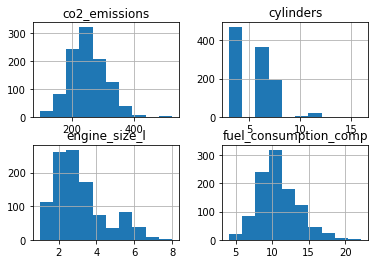

In [16]:
viz = cdf[['engine_size_l','cylinders','fuel_consumption_comp','co2_emissions']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

Text(0, 0.5, 'Emission')

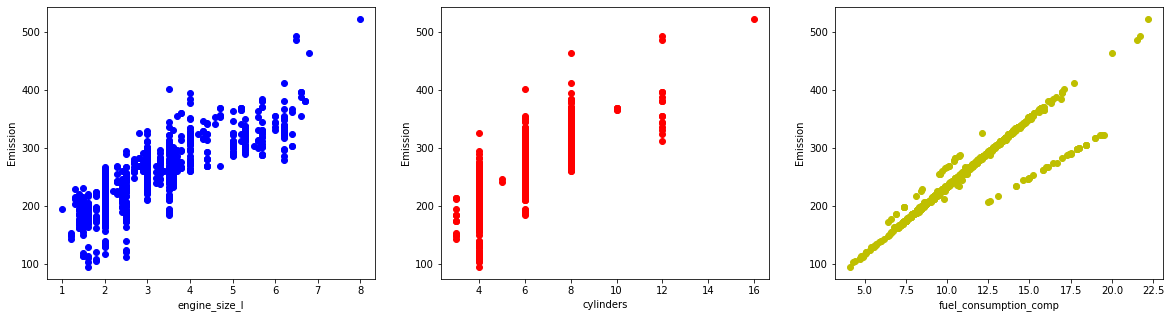

In [25]:
plt.figure(figsize= [20,5])
# engine_size_l vs the Emission
plt.subplot(1, 3, 1) # 1 row, 1 cols, subplot 1
plt.scatter(cdf.engine_size_l, cdf.co2_emissions,  color='b');
plt.xlabel("engine_size_l")
plt.ylabel("Emission")

# cylinders vs the Emission
plt.subplot(1, 3, 2) # 1 row, 2 cols, subplot 2
plt.scatter(cdf.cylinders, cdf.co2_emissions,  color='r');
plt.xlabel("cylinders")
plt.ylabel("Emission")

# fuel_consumption_comp vs the Emission
plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 3
plt.scatter(cdf.fuel_consumption_comp, cdf.co2_emissions,  color='y')
plt.xlabel("fuel_consumption_comp")
plt.ylabel("Emission")